<a href="https://colab.research.google.com/github/SosaGabriel/DataScience/blob/main/WiNe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datos del sector**  
La vitivinicultura es una economía regional emblemática que tiene el más amplio despliegue territorial. Es imprescindible la promoción de esta actividad económica compuesta mayormente por pequeños y medianos productores.
El complejo vitivinicola es una de las 10 principales cadenas exportadoras del país, junto son casi 500 exportadores que llegan con sus vinos a 127 paises.

<p align=center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQhLBSLR543FLfL4Fq4EV7k9-0j2-gGd_VsQ&usqp=CAU" width="60%"></p>

Los principales mercados para los vinos argentinos son: Estados Unidos, Reino Unido, Canadá, Brasil y Paises Bajos
Nuestro país ocupa el séptimo lugar a nivel mundial de consumo per cápita de vino, siendo actualmente de 22 litros de vino anuales por habitante. Argentina está en el sexto puesto en producción de vinos con 11,8 millones de hectólitros y séptimo lugar en la superficie implantada, con más de 230 mil hectareas
Principales países productores de vino en el mundo en 2019.

El dataset que vamos a trabajar se encuentra en [Kaggle](https://www.kaggle.com/dell4010/wine-dataset), contiene información caracteristicas espefíficas sobre vinos ¿Es vino tinto?¿Es vino blanco?, esa es la tarea a la que nos sumergimos 👷‍♂️👷‍♀️

In [ ]:
#@title
# suprimir los warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.under_sampling import RandomUnderSampler
# permite visualizar todas las columnas
pd.options.display.max_columns = None
#estilo de los gráficos con Seaborn
sns.set_style('dark')


In [ ]:
#desde un archivo local
from google.colab import files
uploaded = files.upload()

Saving wine_dataset.csv to wine_dataset (1).csv


In [ ]:
#Importamos los datos a un dataframes
df_wine= pd.read_csv('/content/wine_dataset.csv')

# EDA: Análisis exploratorio de datos

In [ ]:

# identificar el tipo de cada variable
display(df_wine.dtypes)

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
style                    object
dtype: object

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df_wine['style'].unique()


array(['red', 'white'], dtype=object)

In [ ]:
df_wine['style'].value_counts()

white    4898
red      1599
Name: style, dtype: int64

In [ ]:
#Tenemos nulos?
df_wine.isnull().sum().max()

0

In [ ]:
df_wine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
df_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Cuantas variables(columnas) y entradas(filas) tenemos?

In [ ]:

print("Varialbes: \t{}\nEntradas:\t{}".format(df_wine.shape[1],df_wine.shape[0]))

Varialbes: 	13
Entradas:	6497


Transformamos la columna 'style' a numeric(int64)

In [ ]:
df_wine['style'].replace(['red','white'],[0,1],inplace=True)

In [ ]:
df_wine['style'].unique()

array([0, 1])

Notamos que el conjunto de datos está equilibrado (limpieza), procedemos a separar el dataset para el entrenamiento

In [ ]:
#separamos las variables, almacenamos la columna 'style' en la variable y (variable objetivo)
y=df_wine['style'] 

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: style, dtype: int64

In [ ]:
#del dataset eliminamos la columna 'style', y guardamos el resto en la variable x (variables predictoras)

x= df_wine.drop('style', axis = 1)

In [ ]:
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
x.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
x.shape

(6497, 12)

Conjunto de datos para el entrenamiento y el test
**from sklearn.model_selection import train_test_split**: Dividir matrices o matrices en subconjuntos de pruebas y entrenamientos aleatorios

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
print("X_train.shape: ", x_train.shape)#70%
print("X_test.shape: ", x_test.shape)#30%
print("y_train.shape: ", y_train.shape)#70%
print("y_test.shape: ", y_test.shape)#30%

X_train.shape:  (4547, 12)
X_test.shape:  (1950, 12)
y_train.shape:  (4547,)
y_test.shape:  (1950,)


## [**sklearn.ensemble.ExtraTreesClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)  

Esta clase implementa un metaestimador que se ajusta a una serie de árboles de decisión aleatorios (también conocidos como árboles extra) en varias submuestras del conjunto de datos y utiliza promedios para mejorar la precisión predictiva y el sobreajuste de control.



In [ ]:
#Creamos el modelo con from sklearn.ensemble import ExtraTreesClassifier: crea varios arboles de decisión
modelo = ExtraTreesClassifier()
modelo.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
resultado = modelo.score(x_test, y_test)
print(f'Accuracy: {resultado}') #Accuracy=exactitud

Accuracy: 0.9969230769230769


Realicemos algunas pruebas

In [ ]:
#x_test.shape:  (1950, 12) el modelo no entrnó con estos datos, recordemos que el entrenamiento fue con x_train
x_test[400:403]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5285,7.6,0.30,0.37,1.6,0.087,27.0,177.0,0.99438,3.09,0.50,9.8,5
2890,7.5,0.23,0.32,9.2,0.038,54.0,191.0,0.99660,3.04,0.56,9.7,6
5450,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,7


In [ ]:
y_test[400:403]

5285    1
2890    1
5450    1
Name: style, dtype: int64

Corroboramos que el modelo pueda predecir: predict

In [ ]:
prediccion=modelo.predict(x_test[400:403])

In [ ]:
prediccion  #predijo correctamente

array([1, 1, 1])

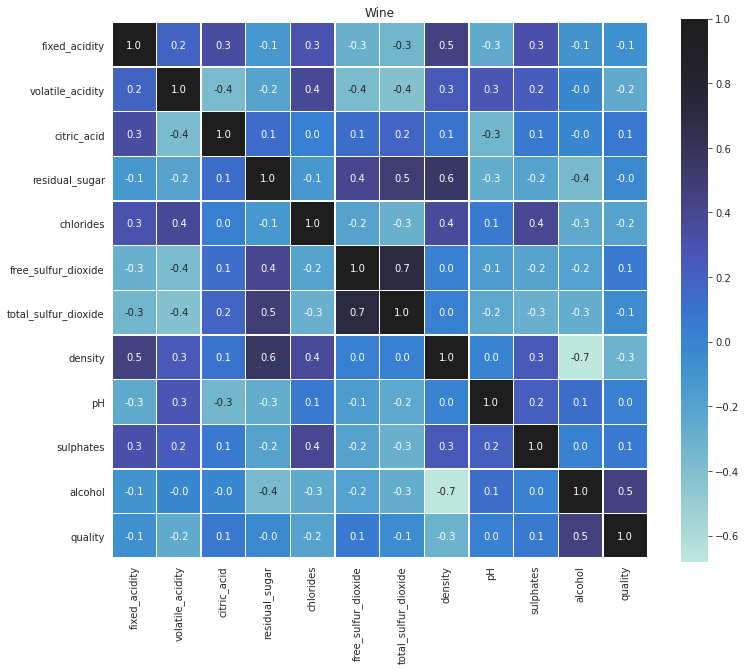

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,10))
sns.heatmap(x_train.corr(), square = True, linewidths= .4, annot=True, fmt='.1f',center=True,ax=ax)#,center=True
ax.set_title('Wine')
plt.show()